# Project Supervised Learning



> GAUTRON Chloé





Subject : Image classification | Classification of textures in colorectal cancer histology, with 8 possible labels with the Tensorflow colorectal_histology dataset.

####Import of libraries and dataset:

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [3]:
data = tfds.load('ColorectalHistology', split='train[:75%]')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/colorectal_histology/2.0.0.incompleteYP1T7V/colorectal_histology-train.tfrecor…

Dataset colorectal_histology downloaded and prepared to ~/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [3]:
train_data = tfds.load('ColorectalHistology', split='train[:80%]', as_supervised=True)
test_data = tfds.load('ColorectalHistology', split='train[-20%:]',as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/5000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/colorectal_histology/2.0.0.incompleteYFJDZC/colorectal_histology-train.tfrecor…

Dataset colorectal_histology downloaded and prepared to ~/tensorflow_datasets/colorectal_histology/2.0.0. Subsequent calls will reuse this data.


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


####Visualization of some data:

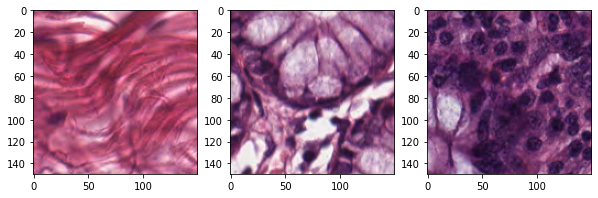

In [4]:
fig, axs = plt.subplots(1, 3,figsize=(10,10))
for i in range(3) :  
  for image, label in train_data.take(i+1) :
      axs[i].imshow(image)

####Functions we are going to use over the notebook:

In [17]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [18]:
def resized_images(image,label) :  
  return(tf.image.resize(image,[64,64])/255 , label)

####Data pre-processing:

In [19]:
train_data = train_data.map(resized_images)
test_data = test_data.map(resized_images)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [20]:
for image,label in train_data.take(1) : 
  print(image.shape)

(64, 64, 3)


The batch size should be a power of 2 to take full advantage of the GPUs processing.

In [21]:
train_data = train_data.batch(32)
test_data = test_data.batch(32)

####First simple model:

In [11]:
from tensorflow.python.ops.gen_math_ops import mod_eager_fallback
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(64, 64, 3)))

model.add(keras.layers.Dense(activation='relu', units=128))
model.add(keras.layers.Dense(activation='softmax', units=8))

The first layer in this array, the ***Flatten*** layer, transforms the image format from a 3-dimensional array (of 64 by 64 pixels over 3 channels) to a one-dimensional array (of 64 * 64 * 3 = 12288 pixels). This layer has no parameters to learn; it just reformats the data.

Once the pixels are flattened, the network consists of a sequence of two layers ***Dense*** layers . These are densely connected or fully connected neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array of length 9.  

*Remark : The dense layer’s neuron in a model receives output from every neuron of its preceding layer, where neurons of the dense layer perform matrix-vector multiplication*.

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              #loss=tf.keras.losses.SparseCategoricalCrossentropy,
              #loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(train_data, epochs=30, validation_data = test_data)

Epoch 1/30
63/63 [==============================] - 1s 23ms/step - loss: 1.8770 - accuracy: 0.3817 - val_loss: 1.3770 - val_accuracy: 0.3830
Epoch 2/30
63/63 [==============================] - 1s 21ms/step - loss: 1.2261 - accuracy: 0.4610 - val_loss: 1.3186 - val_accuracy: 0.3920
Epoch 3/30
63/63 [==============================] - 1s 20ms/step - loss: 1.1758 - accuracy: 0.4820 - val_loss: 1.3049 - val_accuracy: 0.4080
Epoch 4/30
63/63 [==============================] - 1s 23ms/step - loss: 1.1239 - accuracy: 0.5017 - val_loss: 1.3140 - val_accuracy: 0.3940
Epoch 5/30
63/63 [==============================] - 1s 21ms/step - loss: 1.0882 - accuracy: 0.5192 - val_loss: 1.3134 - val_accuracy: 0.4060
Epoch 6/30
63/63 [==============================] - 1s 22ms/step - loss: 1.0720 - accuracy: 0.5297 - val_loss: 1.2561 - val_accuracy: 0.4360
Epoch 7/30
63/63 [==============================] - 1s 21ms/step - loss: 1.0381 - accuracy: 0.5397 - val_loss: 1.2029 - val_accuracy: 0.4590
Epoch 8/30
63

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 1,574,024
Trainable params: 1,574,024
Non-trainable params: 0
_________________________________________________________________


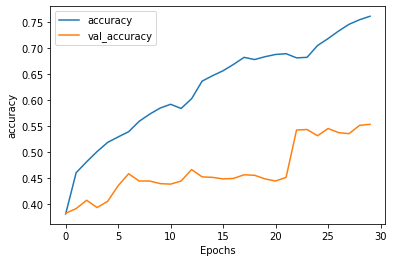

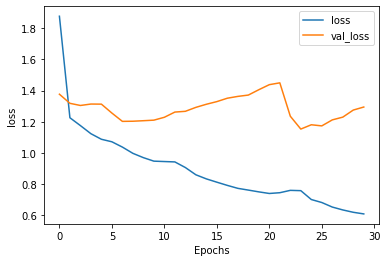

In [20]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

####We will now add the ***Convolution2D*** and ***MaxPool2D*** layers to our model to improve it:

In [21]:
model2 = keras.Sequential()

model2.add(keras.layers.Convolution2D(32, (3 ,3), input_shape=(64, 64, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(keras.layers.Convolution2D(20, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(keras.layers.Convolution2D(12, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(keras.layers.Convolution2D(8, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(activation='relu', units=128))
model2.add(keras.layers.Dense(activation='softmax', units=8))

The ***Convolution2D*** layers create a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

*Remark : a kernel is a convolution matrix or masks which can be used for blurring, sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.*

We follow these layers with ***MaxPool2D*** layers that desample the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
If we consider a layer of a neural network and a mask of the same dimension as our layer but of smaller size. 
We will move this mask along the data of our layer. At each position of the mask corresponds a value of the layer. 
The max-pooling then consists in returning the maximum value of all the values it sees at a given mask position.

In [22]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
history2 = model2.fit(train_data, epochs=30, validation_data = test_data)

Epoch 1/30
63/63 [==============================] - 9s 32ms/step - loss: 1.6936 - accuracy: 0.3025 - val_loss: 1.3689 - val_accuracy: 0.4380
Epoch 2/30
63/63 [==============================] - 2s 29ms/step - loss: 1.1322 - accuracy: 0.5213 - val_loss: 1.2392 - val_accuracy: 0.4130
Epoch 3/30
63/63 [==============================] - 2s 28ms/step - loss: 1.0209 - accuracy: 0.5910 - val_loss: 0.9644 - val_accuracy: 0.5990
Epoch 4/30
63/63 [==============================] - 2s 30ms/step - loss: 0.9467 - accuracy: 0.6102 - val_loss: 0.9613 - val_accuracy: 0.5910
Epoch 5/30
63/63 [==============================] - 2s 28ms/step - loss: 0.9152 - accuracy: 0.6338 - val_loss: 0.8680 - val_accuracy: 0.6410
Epoch 6/30
63/63 [==============================] - 2s 28ms/step - loss: 0.9016 - accuracy: 0.6330 - val_loss: 0.8835 - val_accuracy: 0.6100
Epoch 7/30
63/63 [==============================] - 2s 30ms/step - loss: 0.8571 - accuracy: 0.6553 - val_loss: 0.8282 - val_accuracy: 0.6490
Epoch 8/30
63

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 20)        5780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 20)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 12)        2172      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 12)        

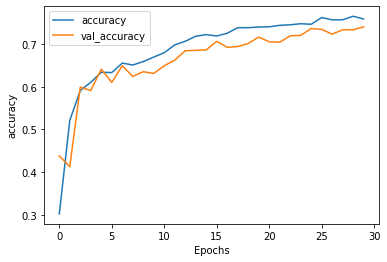

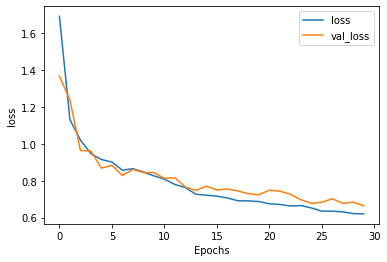

In [25]:
plot_graphs(history2, 'accuracy')
plot_graphs(history2, 'loss')

####We modify the hyperparameters of the ***Conv2D*** layers and add a ***Dense*** layer : 

In [26]:
model3 = keras.Sequential()

model3.add(keras.layers.Convolution2D(128, (3 ,3), input_shape=(64, 64, 3), activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model3.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model3.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model3.add(keras.layers.Convolution2D(16, (3, 3), activation='relu'))
model3.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model3.add(keras.layers.Flatten())

model3.add(keras.layers.Dense(activation='relu', units=256))
model3.add(keras.layers.Dense(activation='relu', units=128))
model3.add(keras.layers.Dense(activation='softmax', units=8))

In [27]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [28]:
history3 = model3.fit(train_data, epochs=30, validation_data = test_data)

Epoch 1/30
63/63 [==============================] - 3s 45ms/step - loss: 1.6540 - accuracy: 0.2690 - val_loss: 1.5062 - val_accuracy: 0.3260
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 1.1410 - accuracy: 0.5165 - val_loss: 1.1512 - val_accuracy: 0.5280
Epoch 3/30
63/63 [==============================] - 3s 40ms/step - loss: 0.9351 - accuracy: 0.6077 - val_loss: 0.8867 - val_accuracy: 0.6240
Epoch 4/30
63/63 [==============================] - 3s 40ms/step - loss: 0.8752 - accuracy: 0.6482 - val_loss: 0.8510 - val_accuracy: 0.6380
Epoch 5/30
63/63 [==============================] - 3s 40ms/step - loss: 0.8142 - accuracy: 0.6590 - val_loss: 0.7770 - val_accuracy: 0.6790
Epoch 6/30
63/63 [==============================] - 2s 39ms/step - loss: 0.7696 - accuracy: 0.6898 - val_loss: 0.7397 - val_accuracy: 0.6850
Epoch 7/30
63/63 [==============================] - 3s 41ms/step - loss: 0.7106 - accuracy: 0.7205 - val_loss: 0.6959 - val_accuracy: 0.7070
Epoch 8/30
63

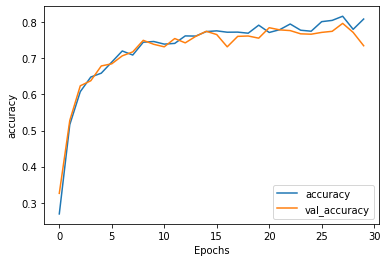

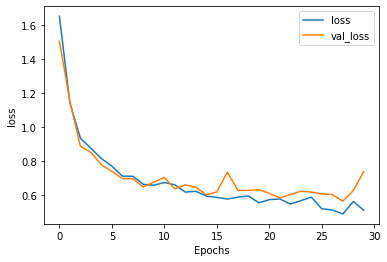

In [30]:
plot_graphs(history3, 'accuracy')
plot_graphs(history3, 'loss')

####We then add a ***Dropout*** layer : 

***Dropout*** is a technique to reduce overfitting when training the model.
In fact, ***Dropout*** temporarily disables some neurons in the network, as well as all its incoming and outgoing connections. 
The choice of the neurons to be disactivated is random. We assign a probability p to all neurons which determines their activation.

At each epoch, we apply this random deactivation. That is to say that at each run the model will learn with a different configuration of neurons, the neurons being activated and deactivated randomly.

In [31]:
model4 = keras.Sequential()

model4.add(keras.layers.Convolution2D(128, (3 ,3), input_shape=(64, 64, 3), activation='relu'))
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model4.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model4.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model4.add(keras.layers.Convolution2D(16, (3, 3), activation='relu'))
model4.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model4.add(keras.layers.Flatten())

model4.add(keras.layers.Dense(activation='relu', units=256))
model4.add(keras.layers.Dense(activation='relu', units=128))
model4.add(keras.layers.Dense(activation='softmax', units=8))

model4.add(keras.layers.Dropout(0.4))

In [32]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
history4 = model4.fit(train_data, epochs=30, validation_data = test_data)

Epoch 1/30
63/63 [==============================] - 3s 43ms/step - loss: 1.9928 - accuracy: 0.2310 - val_loss: 1.9439 - val_accuracy: 0.3030
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 1.9633 - accuracy: 0.2740 - val_loss: 1.9027 - val_accuracy: 0.3770
Epoch 3/30
63/63 [==============================] - 3s 41ms/step - loss: 1.9315 - accuracy: 0.2982 - val_loss: 1.9302 - val_accuracy: 0.3410
Epoch 4/30
63/63 [==============================] - 3s 41ms/step - loss: 1.8680 - accuracy: 0.3510 - val_loss: 1.7645 - val_accuracy: 0.5140
Epoch 5/30
63/63 [==============================] - 3s 41ms/step - loss: 1.8385 - accuracy: 0.3720 - val_loss: 1.7476 - val_accuracy: 0.5530
Epoch 6/30
63/63 [==============================] - 3s 42ms/step - loss: 1.8072 - accuracy: 0.3947 - val_loss: 1.7377 - val_accuracy: 0.5260
Epoch 7/30
63/63 [==============================] - 3s 40ms/step - loss: 1.8466 - accuracy: 0.3663 - val_loss: 1.9610 - val_accuracy: 0.3180
Epoch 8/30
63

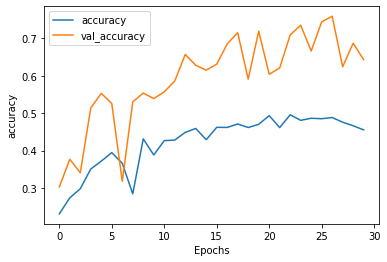

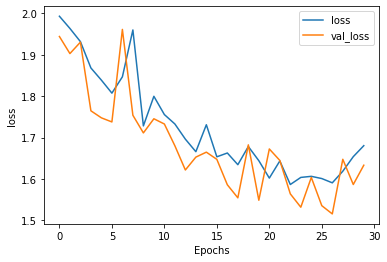

In [34]:
plot_graphs(history4, 'accuracy')
plot_graphs(history4, 'loss')

With a ***Dropout(0.2)*** the accuracy does not exceed 0.4 and it decreases with epochs. So we changed the value to 0.4.

####Try to change the place of the ***Dropout*** layer: 

In [35]:
model5 = keras.Sequential()

model5.add(keras.layers.Convolution2D(128, (3 ,3), input_shape=(64, 64, 3), activation='relu'))
model5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model5.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model5.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
model5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model5.add(keras.layers.Convolution2D(16, (3, 3), activation='relu'))
model5.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model5.add(keras.layers.Flatten())

model5.add(keras.layers.Dropout(0.4))

model5.add(keras.layers.Dense(activation='relu', units=256))
model5.add(keras.layers.Dense(activation='relu', units=128))
model5.add(keras.layers.Dense(activation='softmax', units=8))

In [36]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
history5 = model5.fit(train_data, epochs=30, validation_data = test_data)

Epoch 1/30
63/63 [==============================] - 3s 40ms/step - loss: 1.6742 - accuracy: 0.2503 - val_loss: 1.4690 - val_accuracy: 0.3280
Epoch 2/30
63/63 [==============================] - 3s 40ms/step - loss: 1.4084 - accuracy: 0.3772 - val_loss: 1.1747 - val_accuracy: 0.5320
Epoch 3/30
63/63 [==============================] - 3s 40ms/step - loss: 1.1407 - accuracy: 0.5013 - val_loss: 0.9012 - val_accuracy: 0.6600
Epoch 4/30
63/63 [==============================] - 3s 40ms/step - loss: 1.0190 - accuracy: 0.5705 - val_loss: 0.8997 - val_accuracy: 0.6170
Epoch 5/30
63/63 [==============================] - 3s 40ms/step - loss: 0.9817 - accuracy: 0.5835 - val_loss: 0.8894 - val_accuracy: 0.5790
Epoch 6/30
63/63 [==============================] - 3s 40ms/step - loss: 0.9499 - accuracy: 0.5955 - val_loss: 0.8348 - val_accuracy: 0.6330
Epoch 7/30
63/63 [==============================] - 3s 46ms/step - loss: 0.9008 - accuracy: 0.6292 - val_loss: 0.8248 - val_accuracy: 0.6630
Epoch 8/30
63

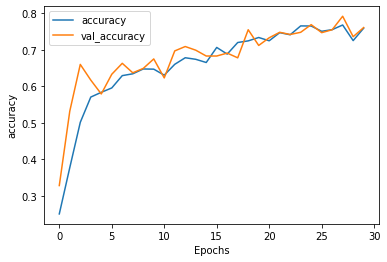

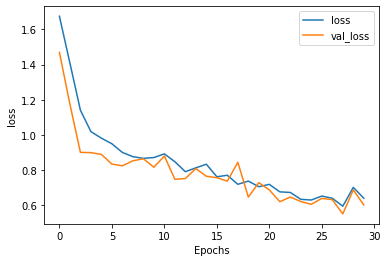

In [38]:
plot_graphs(history5, 'accuracy')
plot_graphs(history5, 'loss')

In [39]:
model6 = keras.Sequential()

model6.add(keras.layers.Convolution2D(128, (3 ,3), input_shape=(64, 64, 3), activation='relu'))
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model6.add(keras.layers.Convolution2D(64, (3, 3), activation='relu'))
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model6.add(keras.layers.Convolution2D(32, (3, 3), activation='relu'))
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model6.add(keras.layers.Convolution2D(16, (3, 3), activation='relu'))
model6.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model6.add(keras.layers.Flatten())

model6.add(keras.layers.Dense(activation='relu', units=256))
model6.add(keras.layers.Dropout(0.4))

model6.add(keras.layers.Dense(activation='relu', units=128))
model6.add(keras.layers.Dropout(0.4))

model6.add(keras.layers.Dense(activation='softmax', units=8))

In [40]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history6 = model6.fit(train_data, epochs=30, validation_data = test_data)

Epoch 1/30
63/63 [==============================] - 3s 42ms/step - loss: 1.8192 - accuracy: 0.2315 - val_loss: 1.5206 - val_accuracy: 0.3270
Epoch 2/30
63/63 [==============================] - 3s 42ms/step - loss: 1.3535 - accuracy: 0.4060 - val_loss: 1.0697 - val_accuracy: 0.5170
Epoch 3/30
63/63 [==============================] - 3s 40ms/step - loss: 1.0948 - accuracy: 0.5232 - val_loss: 0.9541 - val_accuracy: 0.5710
Epoch 4/30
63/63 [==============================] - 3s 41ms/step - loss: 1.0446 - accuracy: 0.5595 - val_loss: 0.9569 - val_accuracy: 0.5750
Epoch 5/30
63/63 [==============================] - 2s 39ms/step - loss: 0.9440 - accuracy: 0.6068 - val_loss: 0.8282 - val_accuracy: 0.6260
Epoch 6/30
63/63 [==============================] - 3s 40ms/step - loss: 0.9152 - accuracy: 0.6220 - val_loss: 0.8573 - val_accuracy: 0.6210
Epoch 7/30
63/63 [==============================] - 2s 40ms/step - loss: 0.8573 - accuracy: 0.6582 - val_loss: 0.8174 - val_accuracy: 0.6560
Epoch 8/30
63

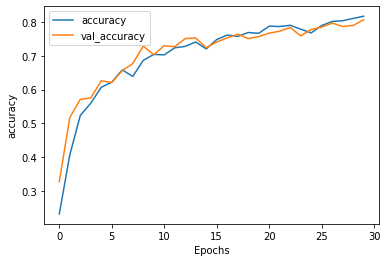

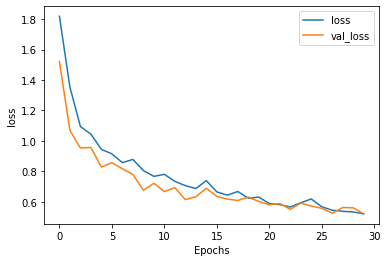

In [41]:
plot_graphs(history6, 'accuracy')
plot_graphs(history6, 'loss')

####We now add a ***Batch Normalization*** layer and try to change the hyperparameters:

In [10]:
model7 = keras.Sequential()

model7.add(keras.layers.Convolution2D(64, (3 ,3), input_shape=(64, 64, 3), activation='relu', padding='same'))
model7.add(keras.layers.BatchNormalization())
model7.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model7.add(keras.layers.Convolution2D(64, (3, 3), activation='relu', padding='same'))
model7.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model7.add(keras.layers.Convolution2D(128, (3, 3), activation='relu', padding='same'))
model7.add(keras.layers.AveragePooling2D(pool_size=(2, 2)))

model7.add(keras.layers.Convolution2D(128, (3, 3), activation='relu', padding='same'))
model7.add(keras.layers.AveragePooling2D(pool_size=(2, 2)))

model7.add(keras.layers.Flatten())

model7.add(keras.layers.Dense(activation='relu', units=256))
model7.add(keras.layers.Dropout(0.4))

model7.add(keras.layers.Dense(activation='relu', units=128))
model7.add(keras.layers.Dropout(0.4))

model7.add(keras.layers.Dense(activation='softmax', units=8))

In the ***Convolution2D*** layer, ***padding*** allows us to keep the same image size despite the convolution. Since we know that pixels are inevitably lost after convolution, we can anticipate this by adding pixels beforehand. For example, if a (3, 3) filter is to be used, we could add 2 rows and 2 columns of pixels to the image beforehand so that when the convolution is performed, the image size is the same as the original image.

We also change one ***MaxPool2D*** layer for an ***AveragePooling2D*** layer in order not to have images with too much contrast. 

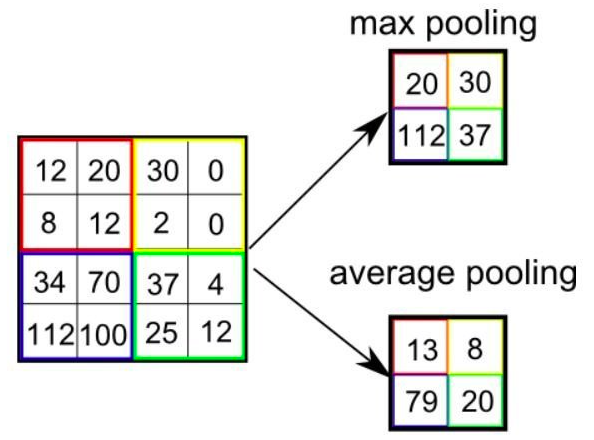

We also tried to change the dimensionality of the output spaces of the ***Convolution2D*** layers. 

In [12]:
model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history7 = model7.fit(train_data, epochs=50, validation_data = test_data)

Epoch 1/50


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


125/125 [==============================] - 15s 50ms/step - loss: 1.4354 - accuracy: 0.4065 - val_loss: 1.7731 - val_accuracy: 0.4350
Epoch 2/50
125/125 [==============================] - 4s 31ms/step - loss: 1.0417 - accuracy: 0.5828 - val_loss: 1.4649 - val_accuracy: 0.5660
Epoch 3/50
125/125 [==============================] - 4s 32ms/step - loss: 0.8965 - accuracy: 0.6547 - val_loss: 1.1305 - val_accuracy: 0.5840
Epoch 4/50
125/125 [==============================] - 4s 30ms/step - loss: 0.8418 - accuracy: 0.6845 - val_loss: 0.9342 - val_accuracy: 0.6280
Epoch 5/50
125/125 [==============================] - 4s 29ms/step - loss: 0.7715 - accuracy: 0.7190 - val_loss: 0.7925 - val_accuracy: 0.6990
Epoch 6/50
125/125 [==============================] - 4s 29ms/step - loss: 0.7258 - accuracy: 0.7340 - val_loss: 0.6034 - val_accuracy: 0.7680
Epoch 7/50
125/125 [==============================] - 4s 30ms/step - loss: 0.6821 - accuracy: 0.7498 - val_loss: 0.6350 - val_accuracy: 0.7480
Epoch 8/5

In [13]:
model7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                        

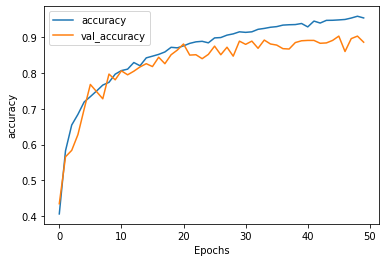

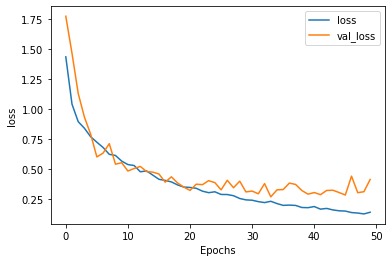

In [14]:
plot_graphs(history7, 'accuracy')
plot_graphs(history7, 'loss')

####Try to add a learning rate scheduler callback function:

At the beginning of every epoch, the ***learning rate scheduler callback*** gets the updated learning rate value from a scheduler function, with the current epoch and current learning rate, and applies the updated learning rate on the optimizer.

It takes the following arguments:


*   Schedule: a function that takes an epoch index (integer, indexed from 0) and current learning rate (float) as inputs and returns a new learning rate as output (float)
*   Verbose: int. 0: quiet, 1: update messages.

We are going to implement a function schedule that keeps the initial learning rate for the first 10 epochs and decreases it exponentially after that:

In [14]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [15]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [25]:
model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history8 = model7.fit(train_data, epochs=50, validation_data = test_data, callbacks=[callback])

Epoch 1/50
125/125 [==============================] - 4s 31ms/step - loss: 1.5146 - accuracy: 0.3738 - val_loss: 1.8359 - val_accuracy: 0.3000 - lr: 1.0000e-04
Epoch 2/50
125/125 [==============================] - 4s 31ms/step - loss: 1.0995 - accuracy: 0.5627 - val_loss: 1.4804 - val_accuracy: 0.5670 - lr: 1.0000e-04
Epoch 3/50
125/125 [==============================] - 4s 33ms/step - loss: 0.9306 - accuracy: 0.6407 - val_loss: 1.1424 - val_accuracy: 0.6180 - lr: 1.0000e-04
Epoch 4/50
125/125 [==============================] - 4s 32ms/step - loss: 0.8272 - accuracy: 0.6867 - val_loss: 0.8819 - val_accuracy: 0.6660 - lr: 1.0000e-04
Epoch 5/50
125/125 [==============================] - 4s 30ms/step - loss: 0.7729 - accuracy: 0.7143 - val_loss: 0.6558 - val_accuracy: 0.7710 - lr: 1.0000e-04
Epoch 6/50
125/125 [==============================] - 4s 32ms/step - loss: 0.7211 - accuracy: 0.7368 - val_loss: 0.8217 - val_accuracy: 0.6970 - lr: 1.0000e-04
Epoch 7/50
125/125 [====================

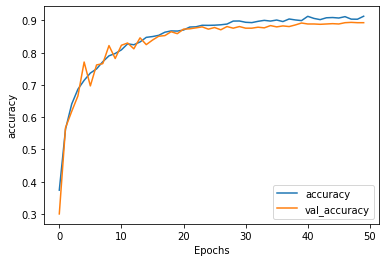

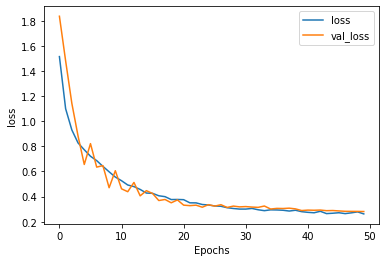

In [27]:
plot_graphs(history8, 'accuracy')
plot_graphs(history8, 'loss')

I add a last callback: an ***early stopping callback*** to train the model on as many epochs as possible without lowering the accuracy.

In [11]:
from keras.callbacks import EarlyStopping

In [12]:
early_stopping = EarlyStopping(monitor='accuracy',patience=10)

In [22]:
model7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history9 = model7.fit(train_data, epochs=100, validation_data = test_data, callbacks=[callback,early_stopping])

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


125/125 [==============================] - 18s 82ms/step - loss: 1.4113 - accuracy: 0.4205 - val_loss: 1.7753 - val_accuracy: 0.3480 - lr: 1.0000e-04
Epoch 2/100
125/125 [==============================] - 4s 33ms/step - loss: 1.0412 - accuracy: 0.5955 - val_loss: 1.4369 - val_accuracy: 0.5360 - lr: 1.0000e-04
Epoch 3/100
125/125 [==============================] - 4s 33ms/step - loss: 0.9020 - accuracy: 0.6570 - val_loss: 1.1576 - val_accuracy: 0.5870 - lr: 1.0000e-04
Epoch 4/100
125/125 [==============================] - 4s 33ms/step - loss: 0.8151 - accuracy: 0.6890 - val_loss: 0.8571 - val_accuracy: 0.6880 - lr: 1.0000e-04
Epoch 5/100
125/125 [==============================] - 4s 32ms/step - loss: 0.7578 - accuracy: 0.7185 - val_loss: 0.7253 - val_accuracy: 0.7240 - lr: 1.0000e-04
Epoch 6/100
125/125 [==============================] - 4s 32ms/step - loss: 0.7004 - accuracy: 0.7402 - val_loss: 0.7472 - val_accuracy: 0.7290 - lr: 1.0000e-04
Epoch 7/100
125/125 [========================

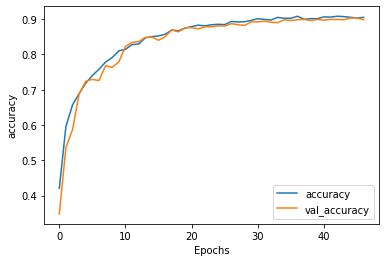

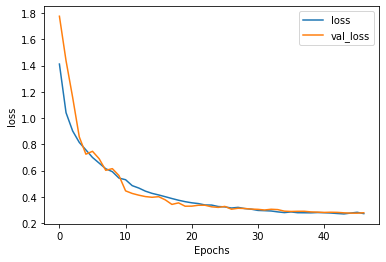

In [23]:
plot_graphs(history9, 'accuracy')
plot_graphs(history9, 'loss')